In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import math
from scipy.linalg import eigh
from numpy import linalg as LA
import seaborn as sb

In [2]:
d0=pd.read_csv('mnist_train.csv')
print(d0.shape)
d0.head()

(42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
d_label=d0['label']
d_label.head()

0    1
1    0
2    1
3    4
4    0
Name: label, dtype: int64

In [4]:
d=d0.drop('label',axis=1)

In [5]:
print(d.shape)
print(d_label.shape)

(42000, 784)
(42000,)


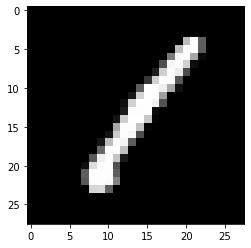

The label for the image is: 1


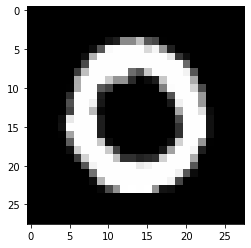

The label for the image is: 0


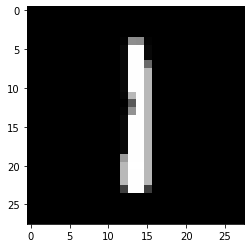

The label for the image is: 1


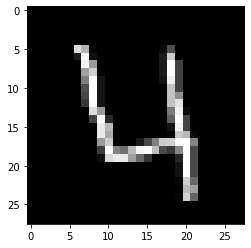

The label for the image is: 4


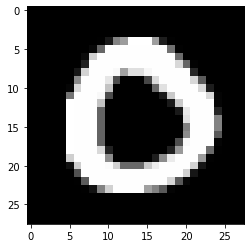

The label for the image is: 0


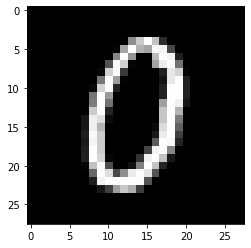

The label for the image is: 0


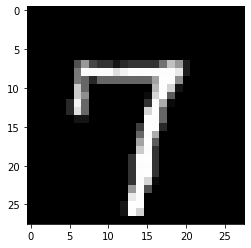

The label for the image is: 7


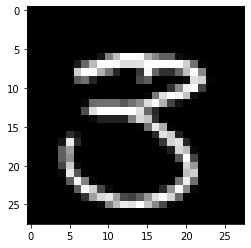

The label for the image is: 3


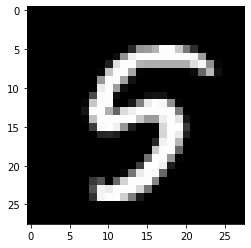

The label for the image is: 5


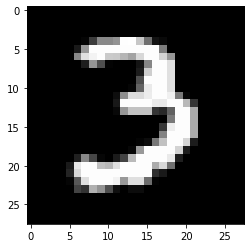

The label for the image is: 3


In [6]:
for i in range(10):    
    x=(d.iloc[i])
    # Convert the pixels into an array using numpy
    array = np.array(x, dtype=np.uint8)
    array=array.reshape(28,28)
    plt.imshow(array,cmap='gray')
    plt.show()
    print('The label for the image is:', d_label[i])

# 2 D Visualization using PCA

In [7]:
# Preprocessing the data: standardising
standardized_data = StandardScaler().fit_transform(d)
sample_data = standardized_data
#find co variance matrix
covar_matrix = np.matmul(sample_data.T, sample_data)
print(covar_matrix.shape)

(784, 784)


In [8]:
#calculate eigen values and eigen vectors
values,vectors=eigh(covar_matrix,eigvals=(782,783))
print(values)
print(vectors.shape)
vectors=vectors.T
print(vectors.shape)

[1222652.44613786 1709211.41082575]
(784, 2)
(2, 784)


In [9]:
new_coordinates=np.matmul(vectors,sample_data.T)
print('Resultant data points shape:',new_coordinates.shape)

Resultant data points shape: (2, 42000)


In [10]:
new_coordinates=np.vstack((new_coordinates,d_label)).T
print(new_coordinates.shape)

(42000, 3)


In [11]:
dataframe=pd.DataFrame(data=new_coordinates,columns=('1st_principal', '2nd_principal','label'))
(dataframe.head())

,1st_principal,2nd_principal,label
0,-5.226445,-5.140478,1.0
1,6.032996,19.292332,0.0
2,-1.705813,-7.644503,1.0
3,5.836139,-0.474207,4.0
4,6.024818,26.559574,0.0


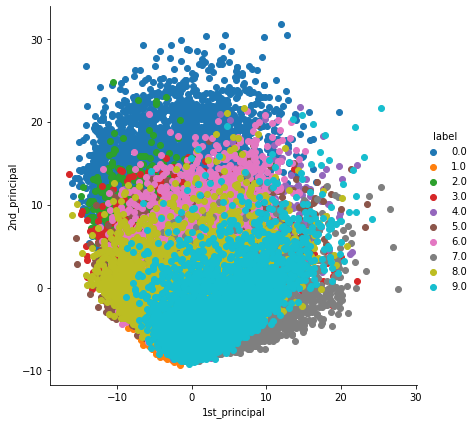

In [12]:
sb.FacetGrid(dataframe,hue='label',height=6).map(plt.scatter,'1st_principal', '2nd_principal').add_legend()
plt.show()

In [13]:
from sklearn import decomposition
pca=decomposition.PCA()
pca.n_components=2
pca_data=pca.fit_transform(sample_data)
print(pca_data.shape)

(42000, 2)


In [14]:
pca_data=np.vstack((pca_data.T,d_label)).T
pca_df=pd.DataFrame(data=pca_data,columns=('1st principal','2nd principal','label'))


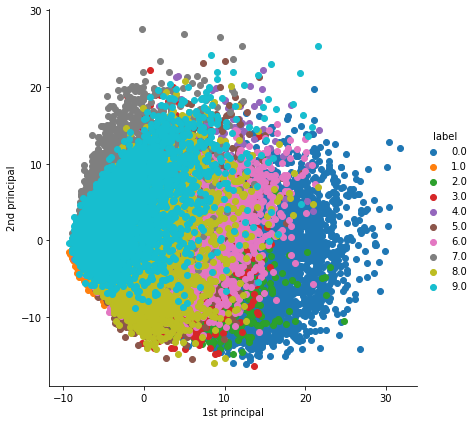

In [15]:
sb.FacetGrid(pca_df,hue='label',height=6).map(plt.scatter,'1st principal', '2nd principal').add_legend()
plt.show()

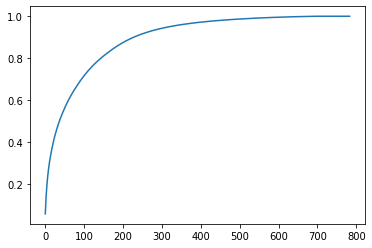

In [24]:
pca.n_components=784
pca_data=pca.fit_transform(sample_data)
percentage=pca.explained_variance_/np.sum(pca.explained_variance_)
cum_sum=np.cumsum(percentage)
plt.figure(1,figsize=(6,4))
plt.clf()
plt.plot(cum_sum)
plt.show()

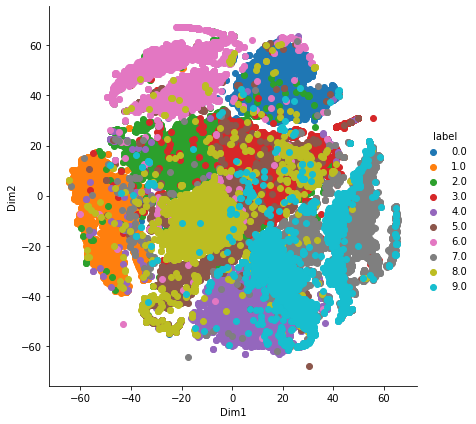

In [26]:
from sklearn.manifold import TSNE
model=TSNE(n_components=2,random_state=0)
tsne_data=model.fit_transform(standardized_data)
tsne_data=np.vstack((tsne_data.T,d_label)).T
tsne_df=pd.DataFrame(data=tsne_data,columns=('Dim1','Dim2','label'))
sb.FacetGrid(tsne_df,hue='label',height=6).map(plt.scatter,'Dim1','Dim2').add_legend()
plt.show()

#for whole data i.e 42k datapoints it almost took 3 hours to show results (converting to 2-D representation)